# Random forest

Суть метода в том, чтобы обучить много деревьев решений на случайных подмножествах исходного датасета. Далее предсказание осредняется и это осредненное предсказание и есть ответ

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
titanic_data = pd.read_csv('titanic_train.csv')
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'],
                     axis=1)
y = titanic_data.Survived
X = pd.get_dummies(X) # функция для кодирования строковых значений
X.Age.median() # Будем заполнять медианным значением
X = X.fillna({'Age': X.Age.median()})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
clf_rf = RandomForestClassifier()

In [4]:
parametrs = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [5]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [6]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [7]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

___

# Задача 3.2.8

Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

___

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)

In [10]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=15)

In [11]:
predictions = rf.predict(X_test)

___

> Продолжаем текст до задачи

In [12]:
best_clf = grid_search_cv_clf.best_estimator_

In [13]:
best_clf.score(X_test, y_test)

0.8101694915254237

In [14]:
feature_importances = best_clf.feature_importances_

In [15]:
feature_importances

array([0.12668477, 0.08674813, 0.04702312, 0.02368515, 0.18333554,
       0.28899875, 0.18350398, 0.01872605, 0.00847295, 0.03282157])

In [20]:
feature_importances_df = pd.DataFrame({'feature':list(X_train),
                                      'feature_importances': feature_importances})

In [24]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature,feature_importances
5,Sex_female,0.288999
6,Sex_male,0.183504
4,Fare,0.183336
0,Pclass,0.126685
1,Age,0.086748
2,SibSp,0.047023
9,Embarked_S,0.032822
3,Parch,0.023685
7,Embarked_C,0.018726
8,Embarked_Q,0.008473


___

# Задача 3.2.13

Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

___

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [29]:
df = pd.read_csv('heart.csv')

In [30]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [32]:
X, y = df.drop('target', axis=1), df.target

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [64]:
feature_importances = rf.feature_importances_

<AxesSubplot:>

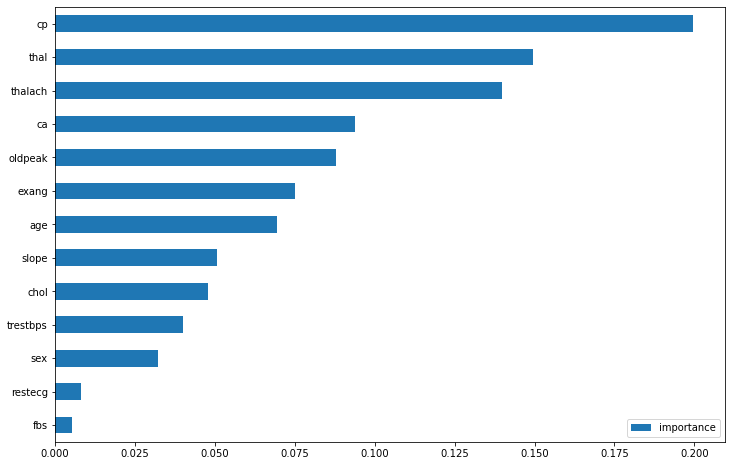

In [65]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))